<a href="https://colab.research.google.com/github/qntkhvn/climbing/blob/main/R/climbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook: https://colab.research.google.com/drive/1GmgUJaMOVLM9cXAgVrTKJEPD71k6GTnu?usp=sharing

In [ ]:
# install.packages("tidyverse")
library(tidyverse)
theme_set(theme_light())

# Qualification

Note: 20 athletes participate in qualification. 8 advance to final round.

Try 10000 sims for now.

In [ ]:
set.seed(1)
nsim <- 10000
nplay <- 20
qual_sim <- list()
for (i in 1:nsim) {
  qual_sim[[i]] <-
    bind_cols(
      player = 1:nplay,
      e1 = sample(1:nplay, replace = FALSE),
      e2 = sample(1:nplay, replace = FALSE),
      e3 = sample(1:nplay, replace = FALSE)
    ) %>%
    mutate(sim = i)
}

qual <- bind_rows(qual_sim)

qual <- qual %>% 
  mutate(qual_score = e1 * e2 * e3) %>% 
  group_by(sim) %>% 
  mutate(qual_rank = rank(qual_score, ties.method = "random")) %>%
  ungroup()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



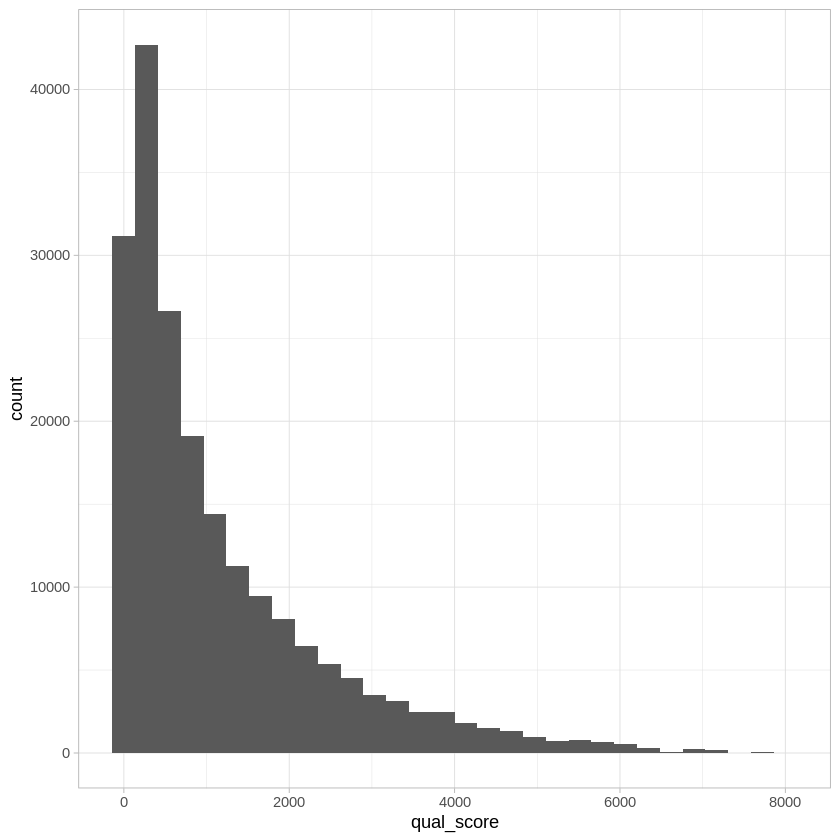

In [ ]:
qual %>%
  ggplot(aes(qual_score)) +
  geom_histogram()

## If you win the first event, what is the probability that you advance?

Rephrase: Prob of advancing (rank >= 8) given winning first event 1

P(advance|win e1) = P(advance and win e1) / P(win e1)


In [ ]:
qual %>% 
  filter(e1 == 1 & qual_rank <= 8) %>% 
  nrow()

[1] 9951

So 9951/10000 = 0.9951? 

## If you win ANY event, what is the probability you advance?  

In [ ]:
qual %>% 
  filter(e1 == 1 | e2 == 1 | e3 == 1) %>%
  nrow()

[1] 28569

In [ ]:
qual %>% 
  filter((e1 == 1 | e2 == 1 | e3 == 1) & qual_rank <= 8) %>% 
  nrow()

[1] 28420

In [ ]:
28420/28569

[1] 0.9947846

## If you finish last in the first event, what is the probability of advancing? 

In [ ]:
qual %>% 
  filter(e1 == 20 & qual_rank <= 8) %>% 
  nrow()

[1] 1830

0.1830

## If you finish last in ANY event, what is the probability you advance? 

In [ ]:
qual %>% 
  filter(e1 == 20 | e2 == 20 | e3 == 20) %>% 
  nrow()

[1] 28514

In [ ]:
qual %>% 
  filter((e1 == 20 | e2 == 20 | e3 == 20) & qual_rank <= 8) %>% 
  nrow()

[1] 5376

In [ ]:
5376/28514

[1] 0.188539

## What is the score that guarantees that you advance/ do not advance? 

avg_score_rank_8
<dbl>
434.5932


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



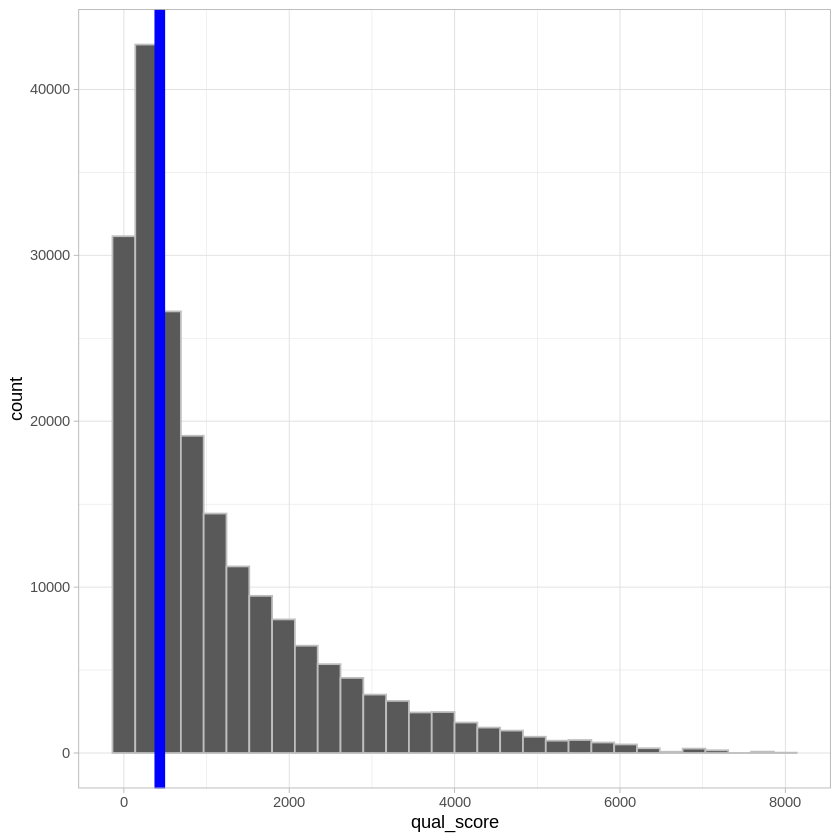

In [ ]:
qual %>%
  filter(qual_rank == 8) %>%
  summarize(avg_score_rank_8 = mean(qual_score))

qual %>%
  ggplot(aes(qual_score)) +
  geom_histogram(color = "gray") +
  geom_vline(xintercept = 434.6, size = 3, color = "blue")

## What is the average score of someone who advances? 

In [ ]:
qual %>% 
  filter(qual_rank <= 8) %>% 
  group_by(qual_rank) %>% 
  summarize(avg_adv_score = mean(qual_score))

qual_rank,avg_adv_score
<int>,<dbl>
1,36.0187
2,73.6111
3,115.3954
4,162.2263
5,216.0041
6,278.1649
7,350.3272
8,434.5932


In [ ]:
qual %>% 
  filter(qual_rank <= 8) %>% 
  ungroup() %>% 
  summarize(avg_adv_score_overall = mean(qual_score))

avg_adv_score_overall
<dbl>
208.2926


## What is/are the distribution on the the first/second/etc. place qualifier? 

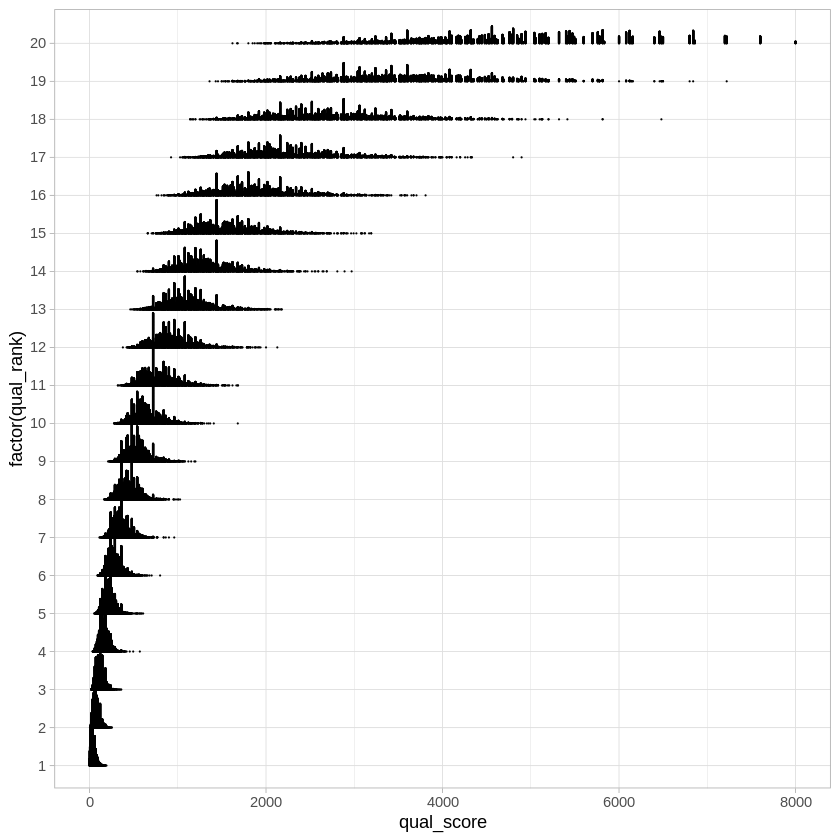

In [ ]:
qual %>% 
  ggplot(aes(x = factor(qual_rank), y = qual_score)) +
  geom_dotplot(binaxis = "y", binwidth = 1) + 
  coord_flip()

Picking joint bandwidth of 39.8



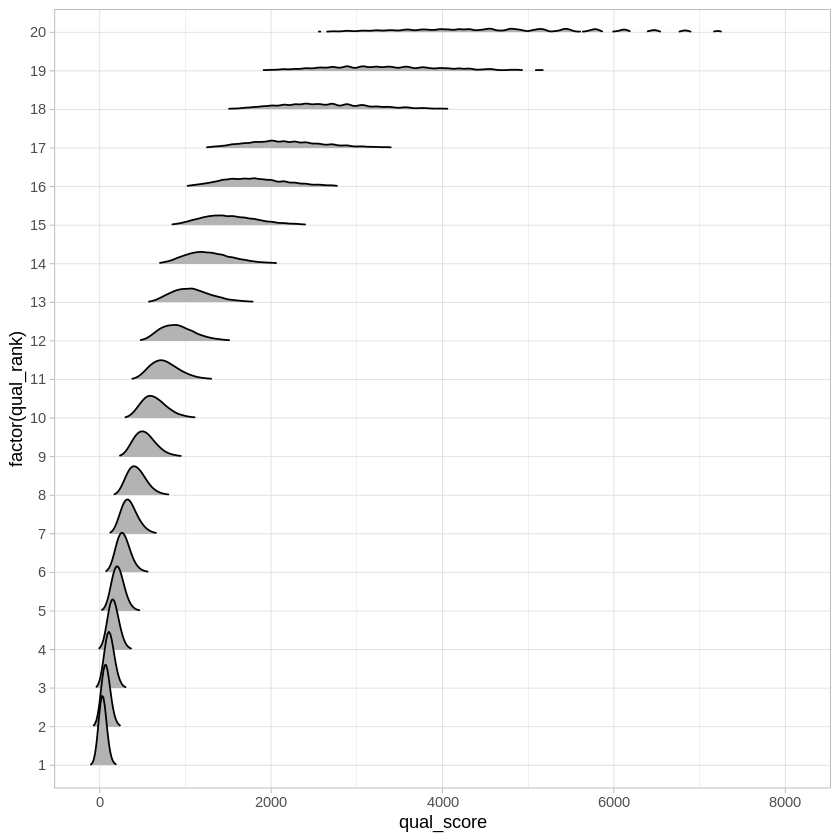

In [ ]:
# install.packages("ggridges")
library(ggridges)
qual %>% 
  ggplot(aes(x = qual_score, y = factor(qual_rank))) +
  geom_density_ridges(rel_min_height = 0.01)

# Final Round

In [ ]:
set.seed(1)
nsim <- 10000
nplay <- 8
final_sim <- list()
for (i in 1:nsim) {
  final_sim[[i]] <-
    bind_cols(
      player = 1:nplay,
      e1 = sample(1:nplay, replace = FALSE),
      e2 = sample(1:nplay, replace = FALSE),
      e3 = sample(1:nplay, replace = FALSE)
    ) %>%
    mutate(sim = i)
}

final <- bind_rows(final_sim) 

final <- final %>% 
  mutate(final_score = e1 * e2 * e3) %>% 
  group_by(sim) %>% 
  mutate(final_rank = rank(final_score, ties.method = "random")) %>%
  ungroup() 

## If you win any event, what is the probability that you win a medal?

In [ ]:
final %>% 
  filter(e1 == 1 | e2 == 1 | e3 == 1) %>% 
  nrow()

final %>% 
  filter((e1 == 1 | e2 == 1 | e3 == 1) & final_rank <= 3) %>% 
  nrow()

21985/26478

[1] 26478

[1] 21979

[1] 0.830312

## If you win the first event, what is the probability you win a medal?

In [ ]:
final %>% 
  filter(e1 == 1 & final_rank <= 3) %>% 
  nrow()/10000

[1] 0.8501

## What is the distribution of the winners score?

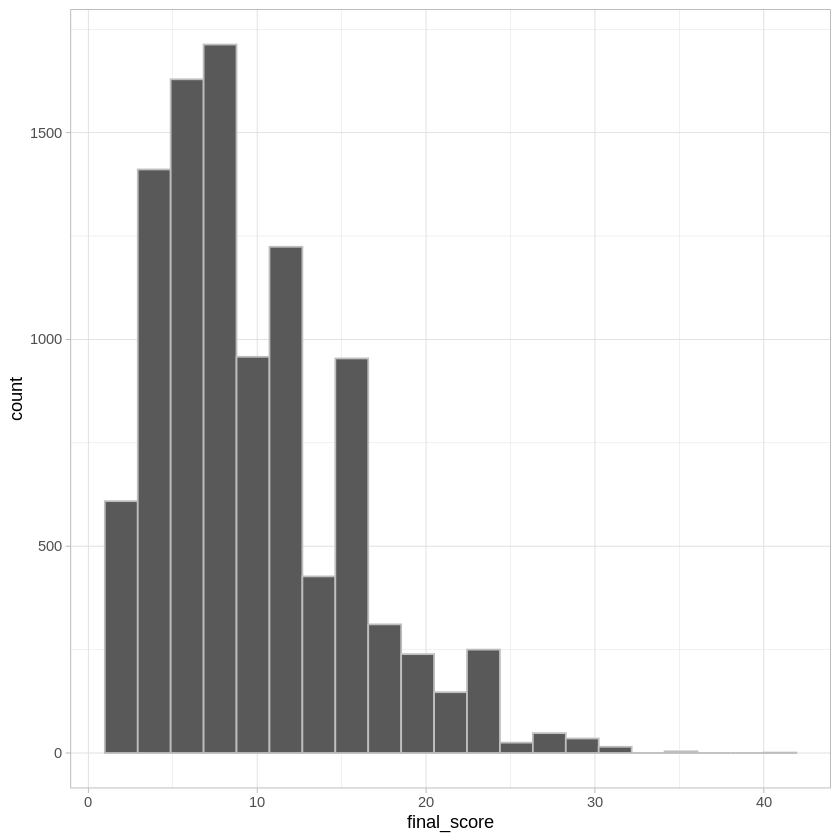

In [ ]:
# final %>%
#   filter(final_rank == 1) %>%
#   pull(final_score) %>%
#   hist(main = "Distribution of winning scores")

final %>% 
  filter(final_rank == 1) %>% 
  ggplot(aes(final_score)) + 
  geom_histogram(bins = 21, color = "gray")

## What is the average score of medalists?

final_rank,avg_score
<int>,<dbl>
1,9.6748
2,20.4143
3,33.2648
4,50.5933
5,74.7620
6,110.0536
7,164.4274
8,265.7760


Picking joint bandwidth of 4.25



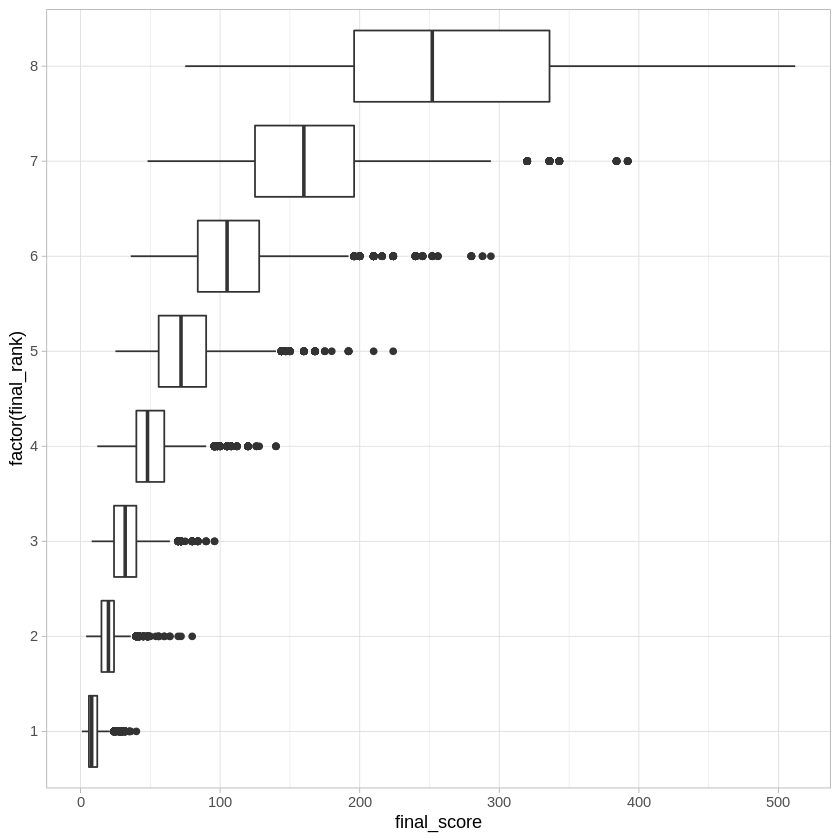

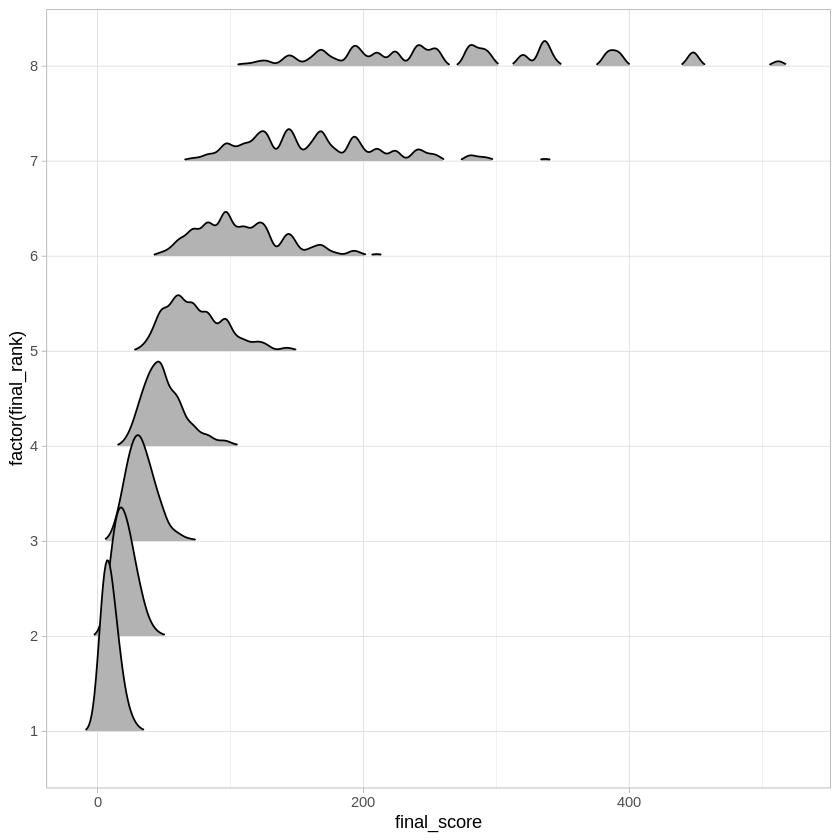

In [ ]:
final %>% 
  group_by(final_rank) %>% 
  summarize(avg_score = mean(final_score))

final %>% 
  ggplot(aes(x = final_score, y = factor(final_rank))) +
  geom_boxplot()

final %>% 
  ggplot(aes(x = final_score, y = factor(final_rank))) +
  geom_density_ridges(rel_min_height = 0.01)

# Sum of ranks instead of Product

In [ ]:
# qualification
set.seed(1)
nsim <- 10000
nplay <- 20
qsim <- list()
for (i in 1:nsim) {
  qsim[[i]] <-
    bind_cols(
      player = 1:nplay,
      e1 = sample(1:nplay, replace = FALSE),
      e2 = sample(1:nplay, replace = FALSE),
      e3 = sample(1:nplay, replace = FALSE)
    ) %>%
    mutate(sim = i)
}

qual_sum <- bind_rows(qsim)

qual_sum <- qual_sum %>% 
  mutate(qual_score = e1 + e2 + e3) %>% 
  group_by(sim) %>% 
  arrange(qual_score, .by_group = TRUE) %>% 
  mutate(qual_rank = row_number()) %>%
  ungroup()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



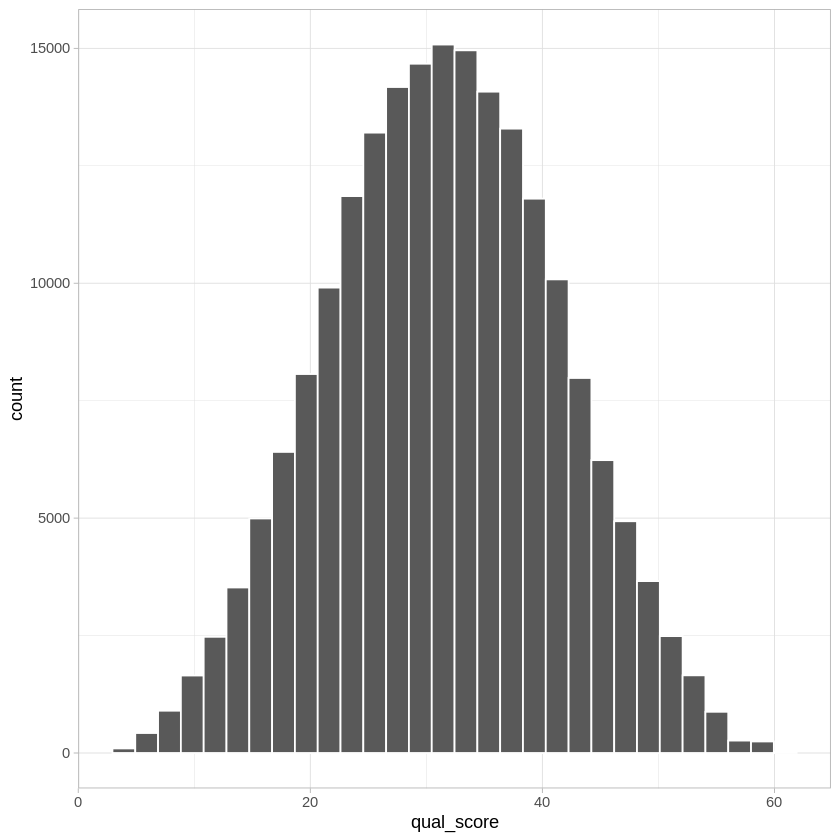

In [ ]:
qual_sum %>%
  ggplot(aes(qual_score)) +
  geom_histogram(color = "white")
# normal, compared to right-skewed when using product

Answer the same questions as the product case

In [ ]:
# advancing given winning first event
qual_sum %>% 
  filter(e1 == 1 & qual_rank <= 8) %>% 
  nrow()

[1] 7733

So only 0.7733, compared to almost perfect

In [ ]:
# advancing given winning any event
qual_sum %>% 
  filter((e1 == 1 | e2 == 1 | e3 == 1) & qual_rank <= 8) %>% 
  nrow()
qual_sum %>% 
  filter(e1 == 1 | e2 == 1 | e3 == 1) %>% 
  nrow()
21990/28569

[1] 21990

[1] 28569

[1] 0.7697154

In [ ]:
# advancing given finishing last in first event
qual_sum %>% 
  filter(e1 == 20 & qual_rank <= 8) %>% 
  nrow()/10000

[1] 0.0894

In [ ]:
# advancing given finishing last in any even
qual_sum %>% 
  filter((e1 == 20 | e2 == 20 | e3 == 20) & qual_rank <= 8) %>% 
  nrow()
qual_sum %>% 
  filter(e1 == 20 | e2 == 20 | e3 == 20) %>% 
  nrow()
2509/28514

[1] 2509

[1] 28514

[1] 0.08799186

In [ ]:
# advancing score
qual_sum %>% 
  filter(qual_rank <= 8) %>% 
  group_by(qual_rank) %>% 
  summarize(avg_adv_score = mean(qual_score))
# about 28 for rank 8

qual_rank,avg_adv_score
<int>,<dbl>
1,12.8094
2,16.9001
3,19.6372
4,21.7334
5,23.5395
6,25.1608
7,26.6765
8,28.1032


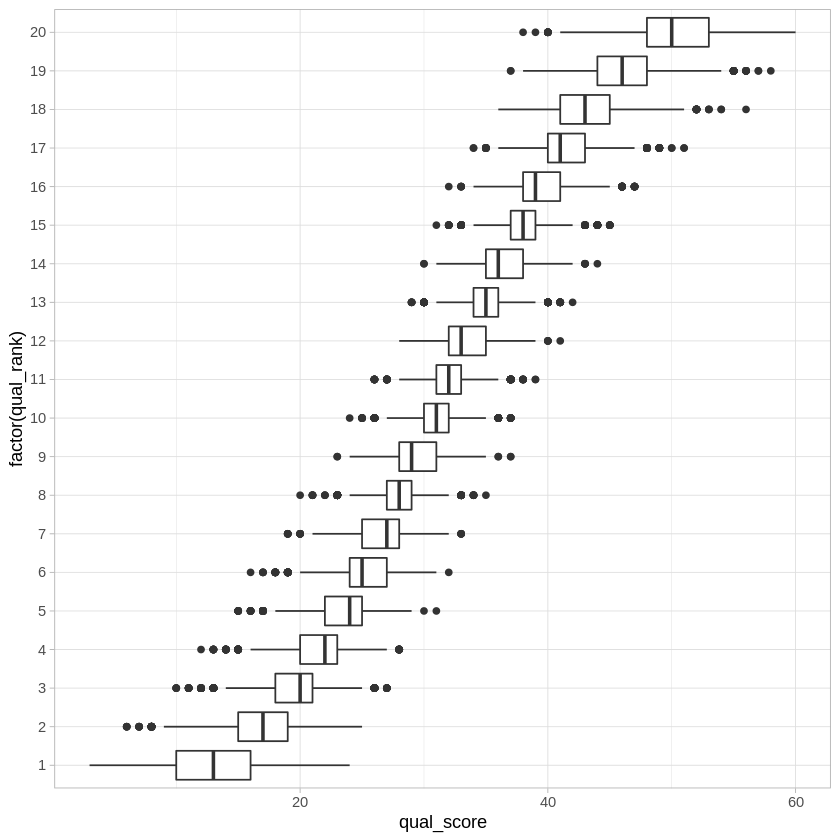

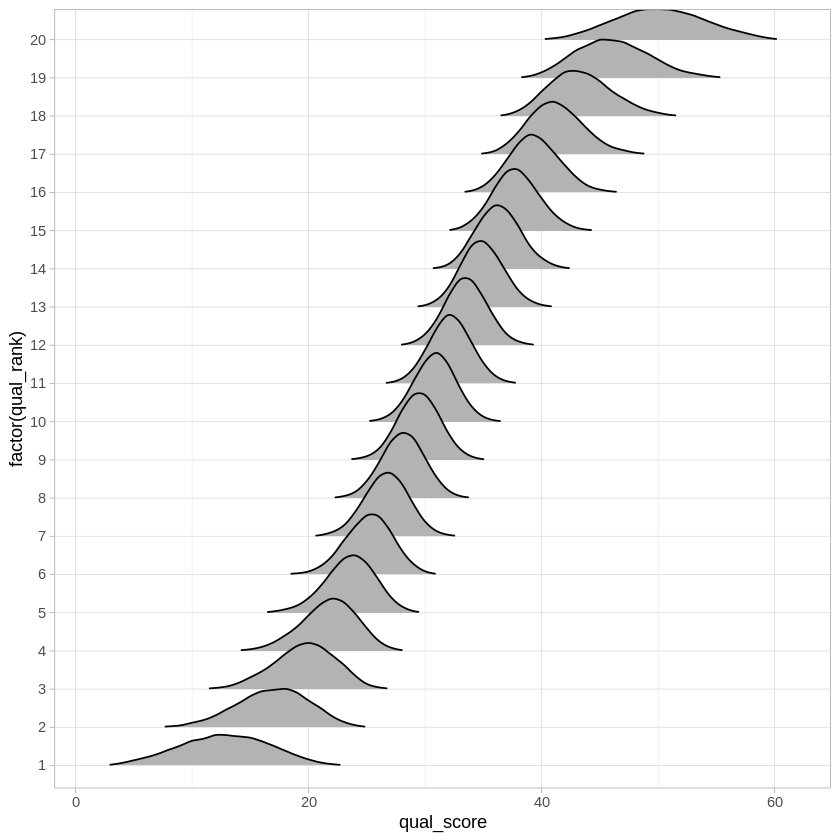

In [ ]:
qual_sum %>% 
  ggplot(aes(x = qual_score, y = factor(qual_rank))) +
  geom_boxplot()
qual_sum %>% 
  ggplot(aes(x = qual_score, y = factor(qual_rank))) +
  geom_density_ridges(bandwidth = 0.6, rel_min_height = 0.01)

In [ ]:
# final
set.seed(1)
nsim <- 10000
nplay <- 8
fsim <- list()
for (i in 1:nsim) {
  fsim[[i]] <-
    bind_cols(
      player = 1:nplay,
      e1 = sample(1:nplay, replace = FALSE),
      e2 = sample(1:nplay, replace = FALSE),
      e3 = sample(1:nplay, replace = FALSE)
    ) %>%
    mutate(sim = i)
}

final_sum <- bind_rows(fsim)

final_sum <- final_sum %>% 
  mutate(final_score = e1 + e2 + e3) %>% 
  group_by(sim) %>% 
  arrange(final_score, .by_group = TRUE) %>% 
  mutate(final_rank = row_number()) %>%
  ungroup()

In [ ]:
# winning a medal given winning any event
final_sum %>% 
  filter(e1 == 1 | e2 == 1 | e3 == 1) %>% 
  nrow()

final_sum %>% 
  filter((e1 == 1 | e2 == 1 | e3 == 1) & final_rank <= 3) %>% 
  nrow()

18248/26478

[1] 26478

[1] 18248

[1] 0.6891759

In [ ]:
# winning a medal given winning first event (= intersect / first event)
final_sum %>% 
  filter(e1 == 1 & final_rank <= 3) %>% 
  nrow()/10000

[1] 0.7224

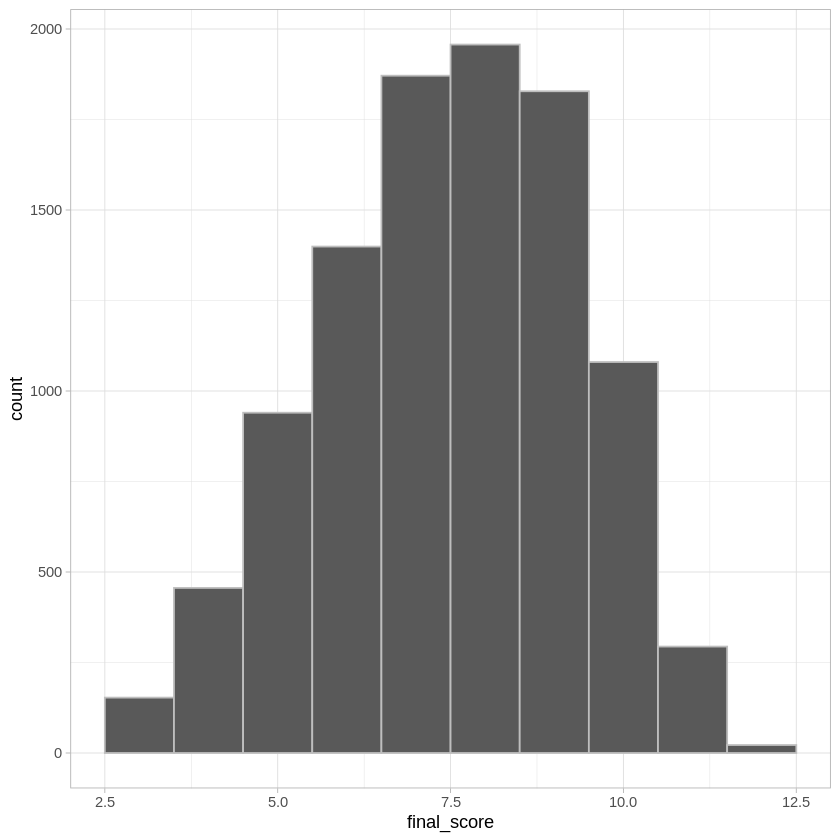

In [ ]:
# distribution of first place scores
final_sum %>% 
  filter(final_rank == 1) %>% 
  ggplot(aes(final_score)) + 
  geom_histogram(bins = 10, color = "gray")

final_rank,avg_score
<int>,<dbl>
1,7.4880
2,9.7943
3,11.3969
4,12.8071
5,14.1613
6,15.5917
7,17.2198
8,19.5409


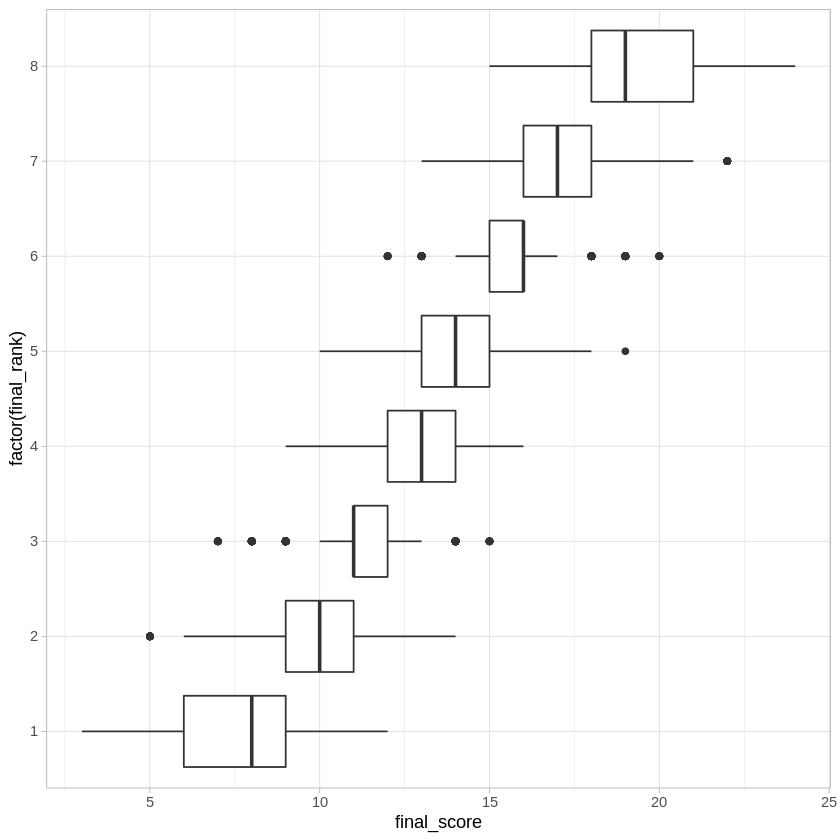

In [ ]:
# avg score for each rank. 
final_sum %>% 
  group_by(final_rank) %>% 
  summarize(avg_score = mean(final_score))

final_sum %>% 
  ggplot(aes(x = final_score, y = factor(final_rank))) +
  geom_boxplot()